# **`Data Science Examples`**


**Directories and Structure**

In [1]:
import os
os.getcwd()

'/content'

In [0]:
# Now create a new directory
os.mkdir('NewDirectory')

# Change the working directory to the newly created directory
os.chdir('NewDirectory')

# Print the current working directory
print("Current working directory after changing it:")
print(os.getcwd())

Current working directory after changing it:
/content/NewDirectory


**Generating lists/arrays** *and storing them as variables*

In [0]:
import numpy as np

a = np.array([0,1,2,3,4,5])
b = np.array([5,4,3,2,1,0])

print(a)
print(b)

[0 1 2 3 4 5]
[5 4 3 2 1 0]


**Plotting lists/arrays** 

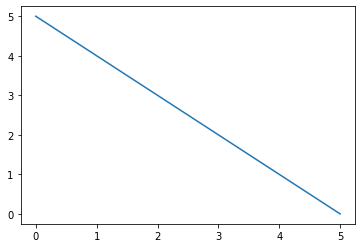

In [0]:
import matplotlib.pyplot as plt

plt.plot(a,b)
plt.show()

*Adding labels/titles*

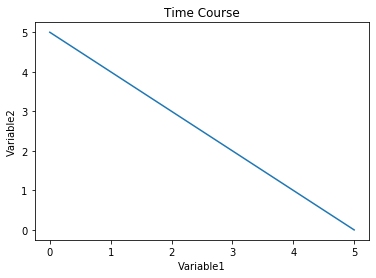

In [0]:
plt.plot(a,b)
plt.xlabel("Variable1")
plt.ylabel("Variable2")
plt.title("Time Course")
plt.show()

**Dataframes**

In [0]:
import pandas as pd

df = pd.DataFrame({"Variable1":a,
                   "Variable2":b})

print(df)

   Variable1  Variable2
0          0          5
1          1          4
2          2          3
3          3          2
4          4          1
5          5          0


*Plotting dataframes*

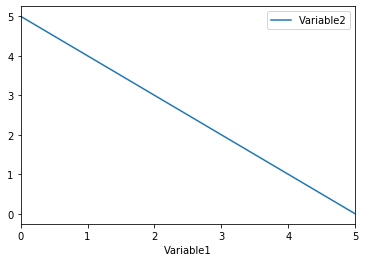

In [0]:
df.plot("Variable1", "Variable2")
plt.show()

***Plotting correlations***

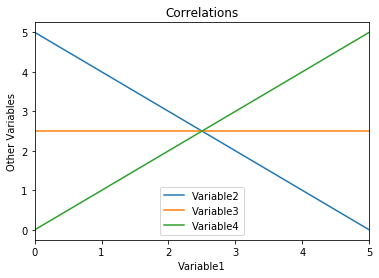

In [0]:
df["Variable3"] = pd.Series([2.5,2.5,2.5,2.5,2.5,2.5])
df["Variable4"] = pd.Series([0,1,2,3,4,5])
df.plot(x="Variable1", y=["Variable2","Variable3","Variable4"])
plt.xlabel("Variable1")
plt.ylabel("Other Variables")
plt.title("Correlations")
plt.show()


**From messy data to data science**

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target


*Getting data in the correct format*

In [0]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


*Dimensionality Reduction*

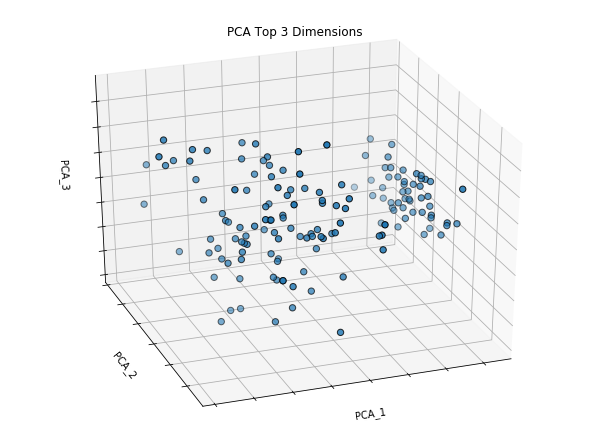

In [0]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA Top 3 Dimensions")
ax.set_xlabel("PCA_1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PCA_2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PCA_3")
ax.w_zaxis.set_ticklabels([])

plt.show()

**Ground Truth**

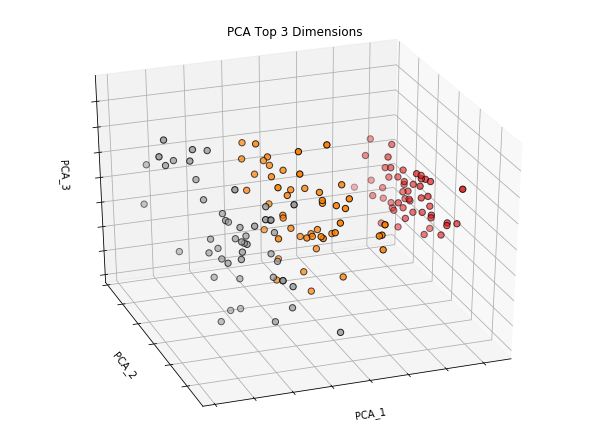

In [0]:
# Ground Truth
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA Top 3 Dimensions")
ax.set_xlabel("PCA_1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PCA_2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PCA_3")
ax.w_zaxis.set_ticklabels([])

plt.show()

*Clustering - trying to find the number that works best*

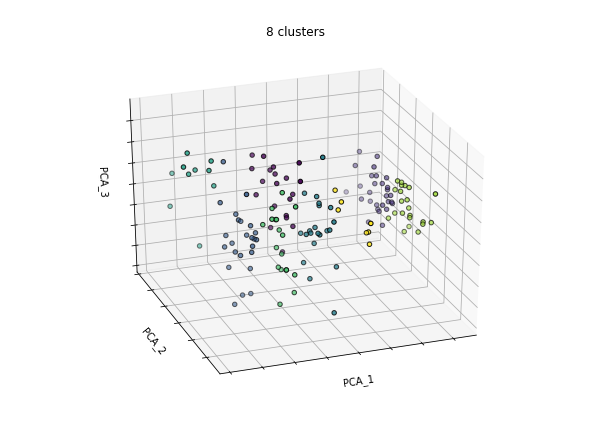

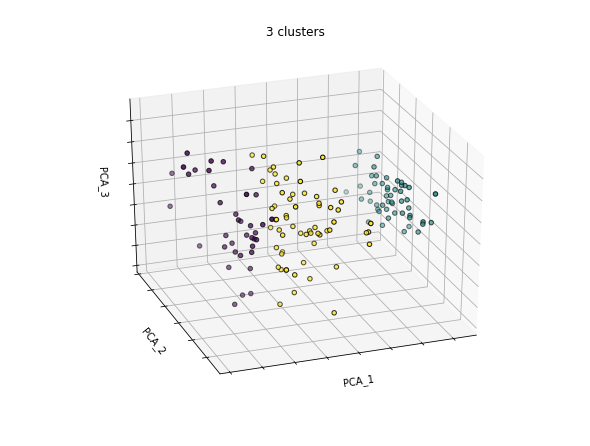

In [0]:
# Testing different numbers of clusters
from sklearn.cluster import KMeans

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['8 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    est.fit(X_reduced)
    labels = est.labels_

    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1



fig.show()

**New data point - what group does it fall into?**

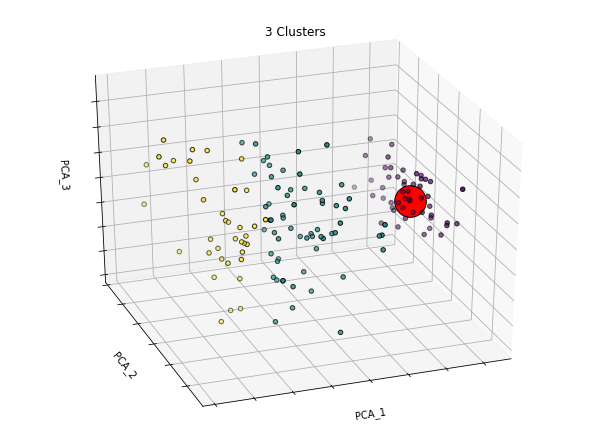

In [0]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
km = KMeans(n_clusters=3).fit(X_reduced)
labels = km.labels_

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
            c=labels.astype(np.float), edgecolor='k')

ax.scatter(-2.5, 0, 0, c = "r", edgecolor="k", s=1000)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title("3 Clusters")
fig.show()


**Example Clustering**

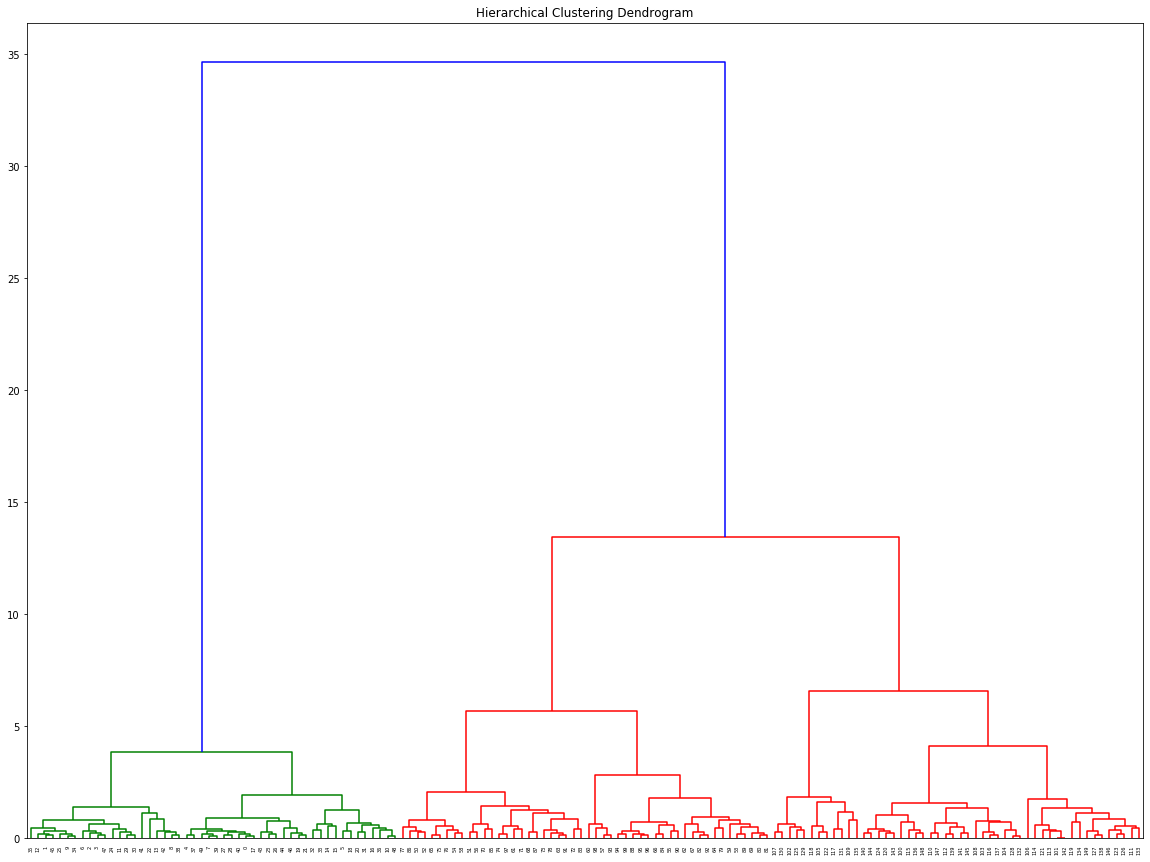

In [0]:
# Example Clustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(iris_df, method='ward'))

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plt.show()